# 광고그룹 분석
- 학습목표
    1. groupby함수 사용실습
    2. 키워드 분석과정에서 진행한 코딩 복습

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [2]:
import matplotlib.pyplot as plt

In [3]:
#matplotlib 한글 폰트 출력코드
#출처 : 데이터 공방 (http:// kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    #맥인 경우
    rc('font', family = 'AppleGothic')

except :
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_excel('/Users/jeonghyeonjeong/Desktop/실습데이터_네이버보고서.xls', skiprows=[0])

앞의 '검색광고 데이터 분석3_데이터 분석'에서는
## as-is : 키워드 기준 분석
을 해 왔다. 
- 키워드의 노출수/ 클릭수/ 총 비용...

지금 광고그룹 분석에서는
## 1. to-be : 광고그룹 기준 분석
을 할 것이다. 
- 데이터의 구성을 광고그룹 기준으로 변경해야한다. 
- 광고그룹의 노출수/ 클릭수 / 총 비용... 등을 groupby함수를 사용하여 분석한다. 
         groupby 함수 : 전달된 열을 기준으로 전체 데이터를 분류하는 함수

In [5]:
grouped = df.groupby('광고그룹') #'광고그룹'이라는 column의 정보를 grouped 변수에 할당

In [6]:
#grouped변수 출력시 객체 정보만 출력됨
grouped

In [7]:
#그래서 이 변수 내의 데이터를 살펴보기 위해서는 집계함수를 사용해야 함
grouped.count() #count함수 : 데이터의 갯수를 집계

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [8]:
grouped.mean() #각 column에 대한 평균값

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.145833,8.400000,0.183898,625.086295,7243.958333
001.BASIC DESIGN,5738.555556,6.800000,0.232924,298.693822,2427.333333
001.데이터분석/ 통계,3715.000000,20.280000,0.890571,1021.473357,19575.600000
002.R,13413.777778,8.533333,0.111199,360.038462,4796.000000
002.UX/UI,3090.800000,4.080000,0.089340,69.928571,550.000000
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.692308,16.707692,0.050832,648.327517,15781.615385
프로그래밍 유치원,5921.625000,7.800000,0.224738,2032.326389,23617.000000
프로그래밍 전체,90375.000000,9.200000,0.024037,123.881559,1626.166667


In [9]:
grouped.median() #중앙값

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.0,3.6,0.055948,765.972222,2458.5
001.BASIC DESIGN,5524.0,2.4,0.038716,357.500000,1023.0
001.데이터분석/ 통계,1813.0,13.8,0.573846,1096.795393,13464.0
002.R,5184.0,3.6,0.028016,119.166667,1287.0
002.UX/UI,2649.0,1.2,0.090600,73.333333,88.0
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.0,3.6,0.023327,852.500000,2706.0
프로그래밍 유치원,3748.0,3.0,0.121833,1763.819444,8002.5
프로그래밍 전체,3455.5,1.2,0.009331,130.497685,225.5


In [10]:
grouped.std() # 그룹데이터의 표준편차

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.109992,17.731616,0.314900,472.866258,15854.712974
001.BASIC DESIGN,4182.624120,9.138928,0.471768,176.145753,3220.042158
001.데이터분석/ 통계,4109.836709,18.316768,0.817334,269.588218,19127.395160
002.R,19333.628900,14.714619,0.165559,371.704042,10077.594033
002.UX/UI,1996.647866,7.179972,0.105666,69.105148,1005.282050
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,188247.583461,35.267418,0.060497,470.848706,37543.642006
프로그래밍 유치원,6642.341496,9.769925,0.251239,1649.704939,37088.923190
프로그래밍 전체,200385.152836,17.263730,0.034516,119.977104,2801.701328


In [11]:
grouped.var() #각 데이터의 분산

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,1.891825e+09,314.410213,0.099162,2.236025e+05,2.513719e+08
001.BASIC DESIGN,1.749434e+07,83.520000,0.222565,3.102733e+04,1.036867e+07
001.데이터분석/ 통계,1.689076e+07,335.504000,0.668035,7.267781e+04,3.658572e+08
002.R,3.737892e+08,216.520000,0.027410,1.381639e+05,1.015579e+08
002.UX/UI,3.986603e+06,51.552000,0.011165,4.775522e+03,1.010592e+06
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,3.543715e+10,1243.790769,0.003660,2.216985e+05,1.409525e+09
프로그래밍 유치원,4.412070e+07,95.451429,0.063121,2.721526e+06,1.375588e+09
프로그래밍 전체,4.015421e+10,298.036364,0.001191,1.439451e+04,7.849530e+06


## 2. 광고그룹 기준 데이터 전처리

In [13]:
#그룹데이터의 합계 - 노출수, 클릭수, 총비용 총 합계를 구해보자. 
grouped.sum() #근데 아래에 나온 결과는 '키워드'에 대한 노출수, 클릭수, 총비용 의 총 합이다. 
#그래서 '광고그룹'에 대한 노출수, 클릭수, 총비용 총 합으로 바꿔야 할 필요가 있다. 

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,8.827081,30004.142165,347710
001.BASIC DESIGN,51647,61.2,2.096316,2688.244398,21846
001.데이터분석/ 통계,37150,202.8,8.905710,10214.733573,195756
002.R,120724,76.8,1.000794,3240.346154,43164
002.UX/UI,15454,20.4,0.446702,349.642857,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.2,0.660812,8428.257716,205161
프로그래밍 유치원,47373,62.4,1.797903,16258.611111,188936
프로그래밍 전체,1084500,110.4,0.288445,1486.578704,19514


In [14]:
#그러기 위한 전처리 필요
df_group = grouped.sum()

#### 1. 클릭률(클릭수/노출수) 전처리 : 데이터프레임의 열 단위 수치연산 

In [16]:
df_group['클릭률(%)'] =  df_group['클릭수'] / df_group['노출수']

#### 2. 평균 클릭비용(cpc) 전처리 : 총비용 / 클릭수

In [19]:
df_group['평균클릭비용(VAT포함,원)'] = df_group['총비용(VAT포함,원)'] / df_group['클릭수']

In [23]:
#그런데 나누는 수가 되는 df_group['클릭수']가 0인 것이 있어, df_group['평균클릭비용(VAT포함,원)']의 결과가 nan이 되는 게 있다. 이런거 전처리 필요


,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.0,0.0,NaN,0
fin_camp_business_4,2136,0.0,0.0,NaN,0
fin_camp_rfs_9,1928,0.0,0.0,NaN,0
다함께 DDD 프로젝트,3689,0.0,0.0,NaN,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.0,0.0,NaN,0


In [27]:
#이럴때는 'nan에 전달된 값으로 결측값을 대체하는 함수(fillna(대체하고 싶은 값))'를 이용하여 nan부분을 채워준다. 
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].fillna(0)
df_group[df_group['클릭수']==0] #아래와 같이 결측값이 0으로 다 채워졌음을 알 수 있다. 

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.0,0.0,0.0,0
fin_camp_business_4,2136,0.0,0.0,0.0,0
fin_camp_rfs_9,1928,0.0,0.0,0.0,0
다함께 DDD 프로젝트,3689,0.0,0.0,0.0,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.0,0.0,0.0,0


#### 3. '원'단위인 것은 소수점이 없어야 하니까 반올림처리하는 전처리

In [28]:
#반올림처리 함수 (round), 소수점 제거 함수(astype(int))
df_group['평균클릭비용(VAT포함,원)'] = round(df_group['평균클릭비용(VAT포함,원)'], 0) #반올림 처리
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].astype(int) #정수형으로 바꿈
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.2,0.000568,862,347710
001.BASIC DESIGN,51647,61.2,0.001185,357,21846
001.데이터분석/ 통계,37150,202.8,0.005459,965,195756
002.R,120724,76.8,0.000636,562,43164
002.UX/UI,15454,20.4,0.001320,135,2750


# 3. 데이터 시각화

#### 1. 노출수 column 선 그래프

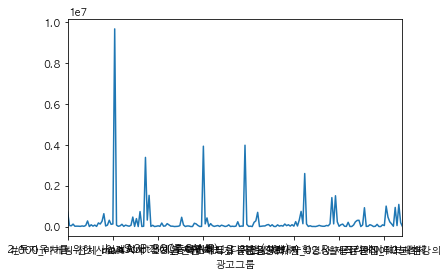

In [29]:
df_group['노출수'].plot()
plt.show()

#### 2. 명확한 패턴이 보일 수 있도록 데이터 시각화 진행

1. as-is : 키워드 기준으로 하였을 때는 x축에 시리즈의 index가 있어 이를 기준으로 그래프가 출력된다. 
2. to-be : 그룹을 기준으로 하였을 때는 정렬된 value를 기준으로 출력

    1) 시리즈의 value를 수치 순서대로 오름차순 정렬하는 것이 필요
    
    2) 정렬된 데이터의 형태대로 다시 index 재생성 후 시각화 해주면 된다. 

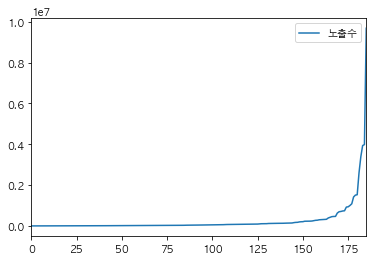

In [30]:
# 노출수 column을 to-be 로 시각화

# 1) 시리즈의 value를 수치 순서대로 오름차순 정렬하는 것이 필요
# 2) 정렬된 데이터의 형태대로 다시 index 재생성 후 시각화 해주면 된다.
((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹', axis = 1).plot()
plt.show()

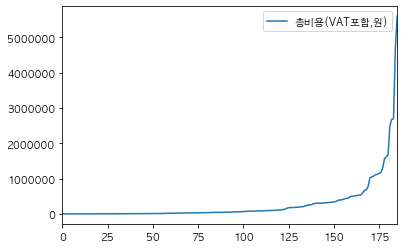

In [32]:
# 총비용 column을 to-be 로 시각화

# 1) 시리즈의 value를 수치 순서대로 오름차순 정렬하는 것이 필요
# 2) 정렬된 데이터의 형태대로 다시 index 재생성 후 시각화 해주면 된다.
((df_group['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('광고그룹', axis = 1).plot()
plt.show()

#### 3. 중점관리 광고그룹/ 저효율 광고그룹 분석
- 중점관리 광고그룹
    1. 노출수 상위 20% (노출수 80백분위수 이상)
    2. 클릭수 상위 10% (클릭수 90백분위수 이상) 을 말함

In [33]:
#df_group에서 imp, click 변수 생성
imp = df_group['노출수']
click = df_group['클릭수']

In [36]:
#조건이 여러개니까
result = df_group[(imp>=imp.quantile(0.8)) & (click >= click.quantile(0.9))]

In [37]:
#result라는 그룹의 index(즉 ,앞에서 reset_index()).drop('광고그룹', axis = 1). 이렇게 해준거)를 출력
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹
    1. 노출수 80백분위수 미만
    2. 클릭수 90백분위수 미만
    3. 총비용 60백분위수 이상
    4. 총비용 90백분위수 미만
   

In [38]:
#df_group에서 cost변수 생성
cost = df_group['총비용(VAT포함,원)']

In [43]:
#조건이 여러개니까
result = df_group[(imp<imp.quantile(0.8)) & (click<click.quantile(0.9))& (cost>=cost.quantile(0.6)) & (cost < cost.quantile(0.9))]

In [44]:
#result라는 그룹의 index(즉 ,앞에서 reset_index()).drop('광고그룹', axis = 1). 이렇게 해준거)를 출력
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')